In [67]:
"""
Purpose: To process and analyze email related data
Inputs: members.tsv, email_responses.tsv, emails.tsv
Outputs: Graphs
Date: 2020-01-05
Author: Daniel Min
Note: Less than 1GB so pandas is used
"""


'\nPurpose: To process and analyze email related data\nInputs: members.tsv, email_responses.tsv, emails.tsv\nOutputs: Graphs\nDate: 2020-01-05\nAuthor: Daniel Min\nNote: Less than 1GB so pandas is used\n'

In [79]:
# Import packages

import glob
import xlrd
import pandas as pd
import numpy as np
import math
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [80]:
# Functions

# Relabel email status
def label_email_status (row):
    if row['action'] == "open" :
        return 1
    if row['action'] == "click" :
        return 2
    if row['action'] == "unsub" :
        return 4
    
"""
Use keys to identify status
1 - open
2 - click
3 - open, click
4 - unsub
5 - open, unsub
6 - click, unsub
7 - Open, click, unsub
"""

'\nUse keys to identify status\n1 - open\n2 - click\n3 - open, click\n4 - unsub\n5 - open, unsub\n6 - click, unsub\n7 - Open, click, unsub\n'

In [81]:
##########################################
# Read response data
##########################################

path_response = "./email_responses.tsv"

# Response data
response_data = pd.read_csv(path_response, 
                            sep='\t',
                            names=["email_id", "date", "action"],
                            header = 0)

# Manipulation
## Status aggregation
response_data['action_status'] = response_data.apply (lambda row: label_email_status(row), axis=1)
response_data.drop(['action', 'date'], inplace=True, axis=1)
response_data.drop_duplicates(inplace=True)
response_data['action_status'] = response_data['action_status'].groupby(response_data['email_id']).transform('sum')
response_data['action_status'].replace([1,2,3,4,5,6,7], ["Opened", "Clicked", "Clicked", "Unsub", "Unsub", "Unsub", "Unsub"], inplace=True)
response_data.drop_duplicates(inplace=True)

# Type Conversion 
## email_id
response_data['email_id'] = response_data.email_id.astype('int64')

# Duplicate check
# display(response_data[response_data.duplicated(['email_id'],keep=False)].sort_values("email_id"))
## Duplicates exist since an email needs to be opened and clicked/unsubed

# Null email_id
# display(response_data[response_data['email_id'].isnull()])
## No Duplicates exist

# Set email_id as index
response_data.set_index('email_id',inplace=True)



In [82]:
##########################################
# Read email data
##########################################

path_email = "./emails.tsv"

# Read email data
email_data = pd.read_csv(path_email, 
                         sep='\t', 
                         names=["email_id", "email_date", "email_type", "XXXXX", "member_id"])

# Type Conversion 
## member_id
email_data['member_id'] = email_data.member_id.astype('int64')

## email_date
email_data['email_date'] = email_data.email_date.astype('datetime64[ns]')

# Clean 4th column into discrete columns
first_split = email_data['XXXXX'].str.split(":", expand = True)
second_split = first_split[1].str.split("_", expand = True)

## Email type
email_data['true_email_type'] = np.where((email_data['email_type'] == 'T plus 1') | (email_data['email_type'] == 'T plus N'), first_split[0], email_data['email_type'])

## Supp info
email_data['supp_info'] = second_split[1].str.replace('1','')
email_data['supp_info'].fillna('NA',inplace = True) 


## Days
email_data['days'] = second_split[0].str.replace('tplus','')
email_data['days'].fillna(99999,inplace = True) 
email_data['days'] = email_data.days.astype('int32')

#Delete unnecessary columns
email_data.drop(["email_type", "XXXXX"], inplace = True, axis=1)


# Duplicate check
# display(email_data[email_data.duplicated(['email_id'],keep=False)].sort_values("email_id"))
## No duplicates exist

# Null email_id
# display(email_data[email_data['email_id'].isnull()])
## No null email_id

# Set email_id as index
email_data.set_index('email_id',inplace=True)




In [83]:
##########################################
# Read member data
##########################################
path_member = "./members.tsv"

# Read member data and clean up
member_data = pd.read_csv(path_member, sep='\t', error_bad_lines=False) #Data error XXX
    # Row 533191 all values are NAN
member_data.drop(533191, inplace=True)
member_data.drop(['email_domain', 'first_name', 'city', 'pcp_score'], inplace=True, axis=1)
member_data.dropna(subset=['member_id'], inplace=True)

# Type Conversion 
## joined_date
member_data.rename(columns={"date": "joined_date"}, inplace = True)
member_data['joined_date'] = member_data.joined_date.astype('datetime64[ns]')

## Clean hs_or_ged_year and set types
member_data['hs_or_ged_year'] = member_data.hs_or_ged_year.fillna(0).astype(int)

## Clean member_id and set types
member_data['member_id'] = pd.to_numeric(member_data['member_id'], errors='coerce')
member_data.dropna(subset=['member_id'], inplace=True)
member_data['member_id'] = member_data.member_id.astype('int64')



# Duplicate check
# display(member_data[member_data.duplicated(['member_id'],keep=False)].sort_values("member_id"))
## No duplicates

# Null member_id
# display(member_data[member_data['member_id'].isnull()])
## No null member_id

# Set member_ID as index
member_data.set_index('member_id', inplace=True)


b'Skipping line 6361: expected 11 fields, saw 12\n'
b'Skipping line 197786: expected 11 fields, saw 12\nSkipping line 220554: expected 11 fields, saw 12\n'
b'Skipping line 398448: expected 11 fields, saw 12\n'
b'Skipping line 965810: expected 11 fields, saw 12\n'
b'Skipping line 1159343: expected 11 fields, saw 12\nSkipping line 1172111: expected 11 fields, saw 13\nSkipping line 1181285: expected 11 fields, saw 12\n'
b'Skipping line 1248580: expected 11 fields, saw 12\nSkipping line 1303875: expected 11 fields, saw 12\n'
b'Skipping line 1398604: expected 11 fields, saw 14\nSkipping line 1419712: expected 11 fields, saw 12\n'
//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
# Merge all data
email = pd.merge(email_data, response_data, how='left', left_index = True, right_index = True)
email_member = pd.merge(email, member_data, how='left', left_on = 'member_id', right_index = True)

## Set Not_Opened action_status
email_member.loc[email_member.action_status.isnull(), 'action_status'] = "Not_Opened"

# Remove unwanted columns
email_member.drop(['zip'], inplace = True, axis = 1)

In [209]:
# All
"""
action_status
Clicked       0.034041
Not_Opened    0.910003
Opened        0.053906
Unsub         0.002050
"""
email_member.groupby(['action_status']).size() / len(email_member['action_status'])


"""
Transactional Forgot Password Email    0.012686
Transactional JR Welcome Email         0.051824
\N                                     0.000004
birthday_joblist1_s1_v1_f2             0.000663
birthday_s1_v1_f2                      0.028417
fixed_keyword_cloud_s1_v1              0.284657
job_alert_s1_v1                        0.621750
"""



email_member.groupby(['true_email_type']).size() / len(email_member['true_email_type'])



true_email_type
Transactional Forgot Password Email    0.012686
Transactional JR Welcome Email         0.051824
\N                                     0.000004
birthday_joblist1_s1_v1_f2             0.000663
birthday_s1_v1_f2                      0.028417
fixed_keyword_cloud_s1_v1              0.284657
job_alert_s1_v1                        0.621750
dtype: float64

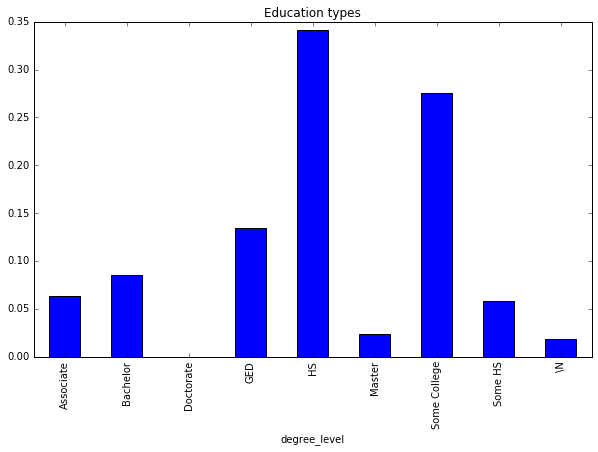

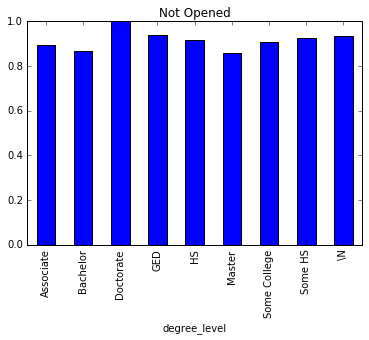

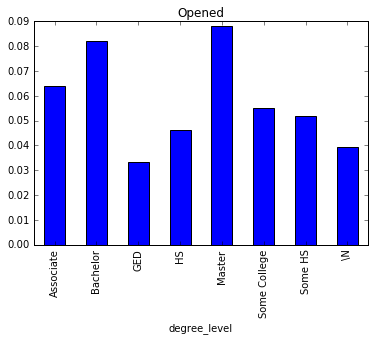

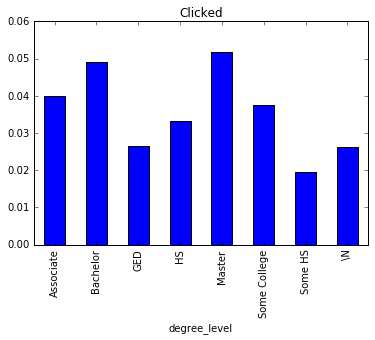

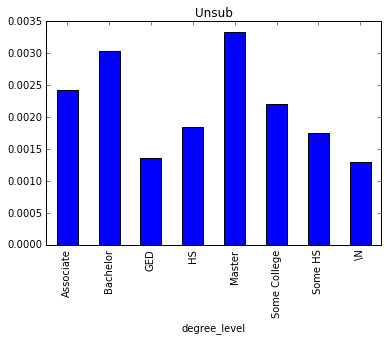

In [210]:
# Analysis
## By education
education = email_member.groupby(['degree_level']).size() / email_member.groupby(['degree_level']).size().sum()

by_education = email_member.groupby(['action_status', 'degree_level']).size() / email_member.groupby(['degree_level']).size()


figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
type_all = education.plot.bar()
plt.title("Education types")
plt.show()

edu_not_opened = by_education['Not_Opened'].plot.bar()
plt.title("Not Opened")
plt.show()

edu_opened = by_education['Opened'].plot.bar()
plt.title("Opened")
plt.show()

edu_clicked = by_education['Clicked'].plot.bar()
plt.title("Clicked")
plt.show()

edu_unsub = by_education['Unsub'].plot.bar()
plt.title("Unsub")
plt.show()


education.to_csv('education.csv')
by_education.to_csv('educationlvl.csv')

# Observation: 
# Emails to members with HS degree or some college makes up 60% of the sent emails
# Email communication is highly ineffective for member without a higher education level (i.e., Masters degree 6% showing 86% unopened rate vs.for high school degree or less)



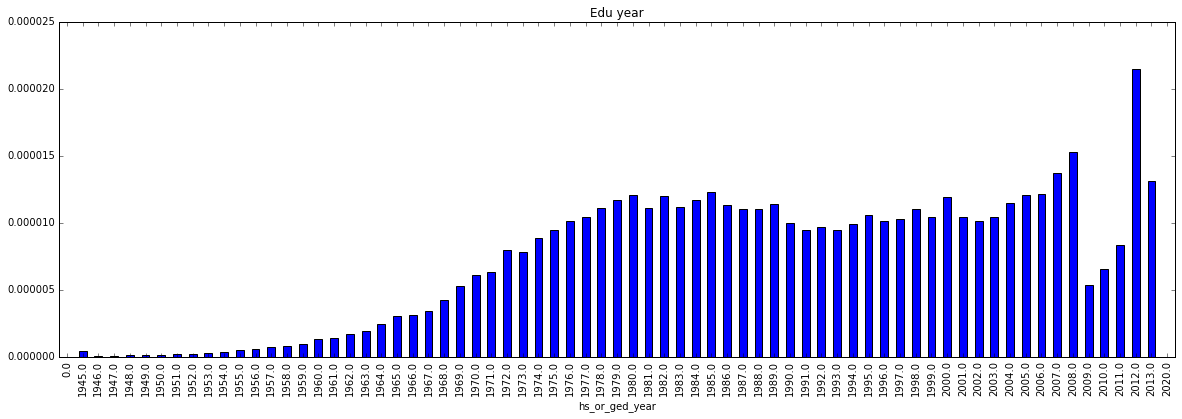

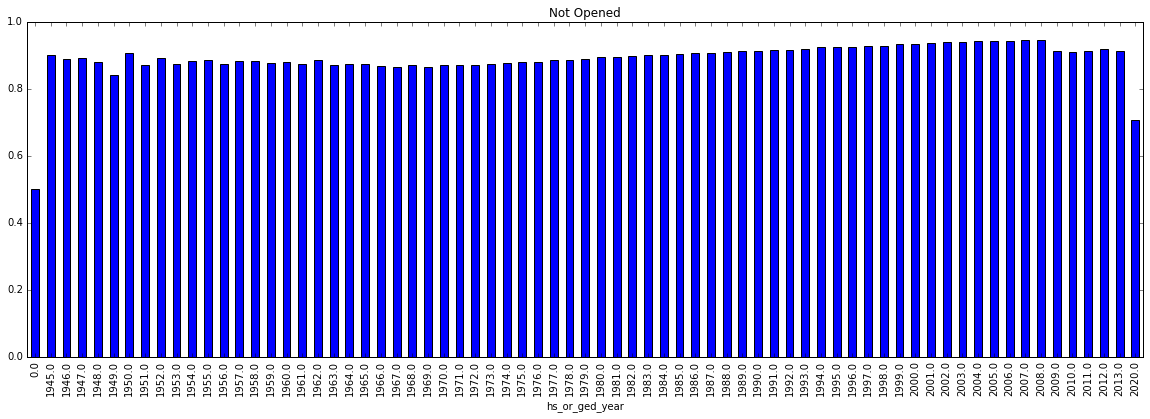

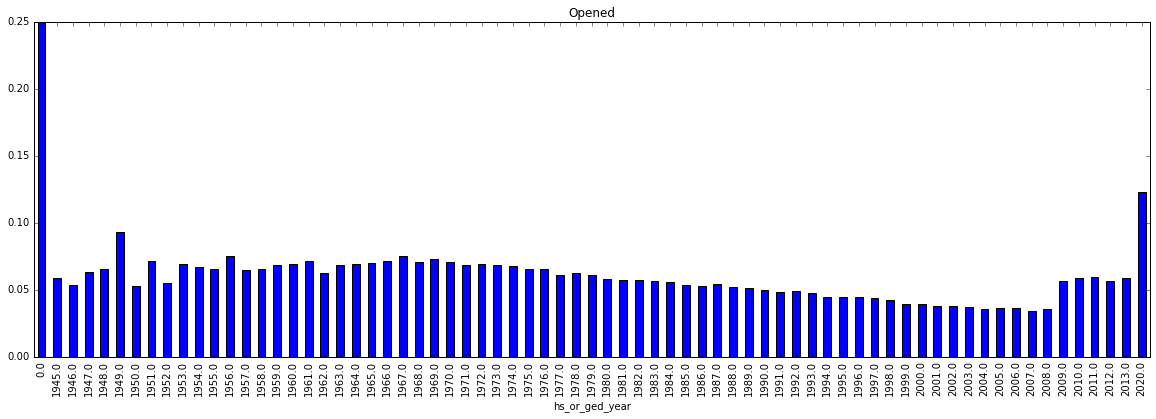

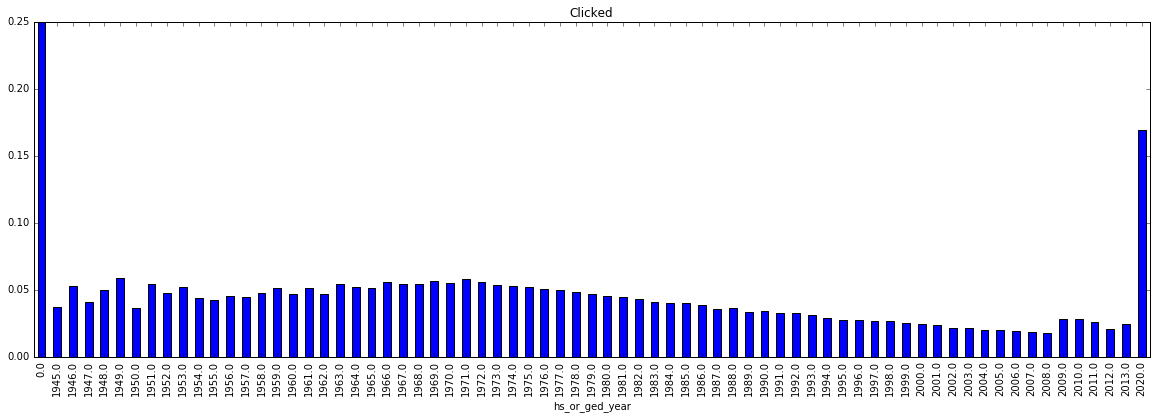

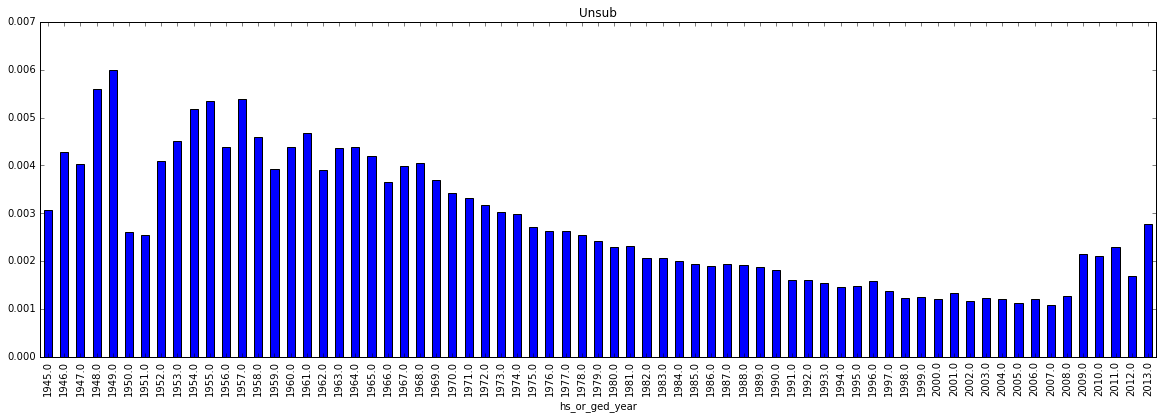

In [152]:
# Analysis
## By GED/HS year - good indicator for the age
edu_year = email_member.groupby(['hs_or_ged_year']).size() / email_member['hs_or_ged_year'].sum()
by_edu_year = email_member.groupby(['action_status', 'hs_or_ged_year']).size() / email_member.groupby(['hs_or_ged_year']).size()


figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
edu_not_opened = edu_year.plot.bar()
plt.title("Edu year")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
edu_not_opened = by_edu_year['Not_Opened'].plot.bar()
plt.title("Not Opened")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
edu_opened = by_edu_year['Opened'].plot.bar()
plt.title("Opened")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
edu_clicked = by_edu_year['Clicked'].plot.bar()
plt.title("Clicked")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
edu_unsub = by_edu_year['Unsub'].plot.bar()
plt.title("Unsub")
plt.show()


# Observation: 
# 10% of the emails are sent to members who received a GED or HS degree prior to 1970 (see appendix)
# Unsubscription rate is lower for those who received GED/HS degree in recent years (0.11% in 2007 vs. 0.34% in 1970)
# Why are members receiving a GED/HS degree after 2007 consistently likely to open emails?


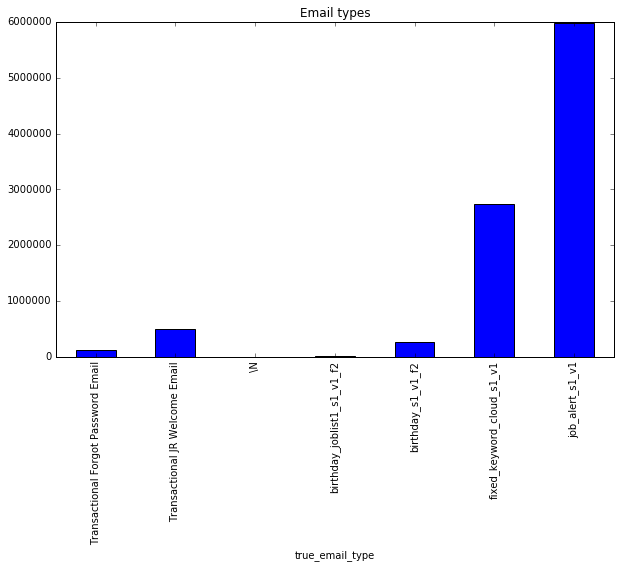

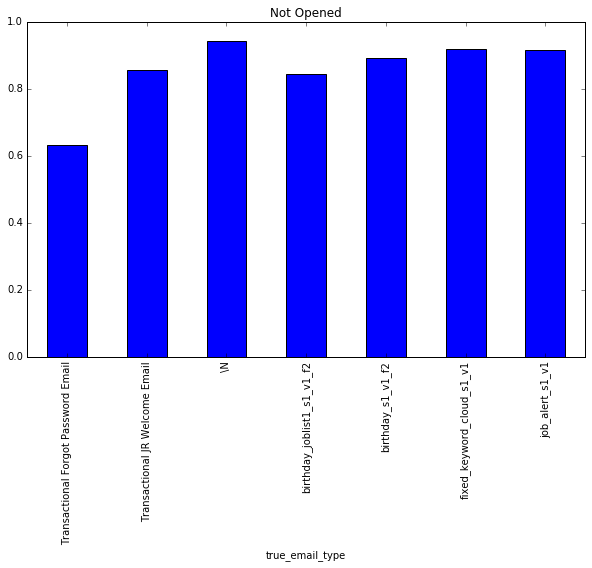

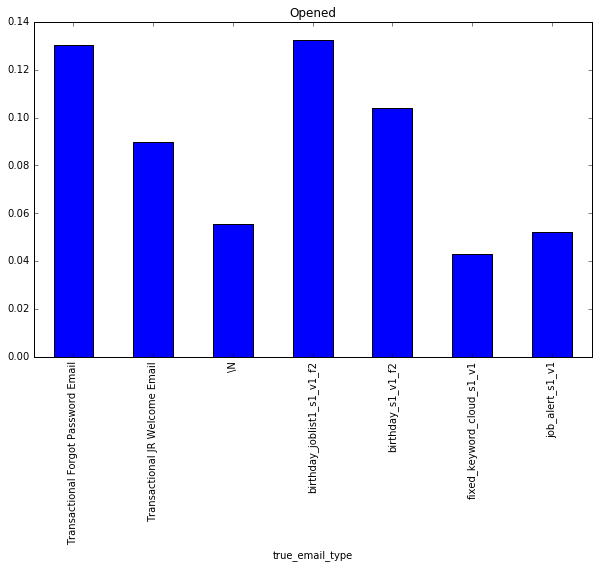

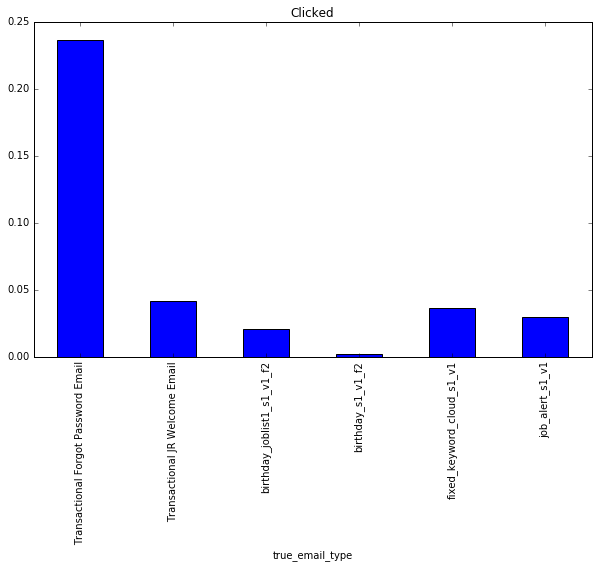

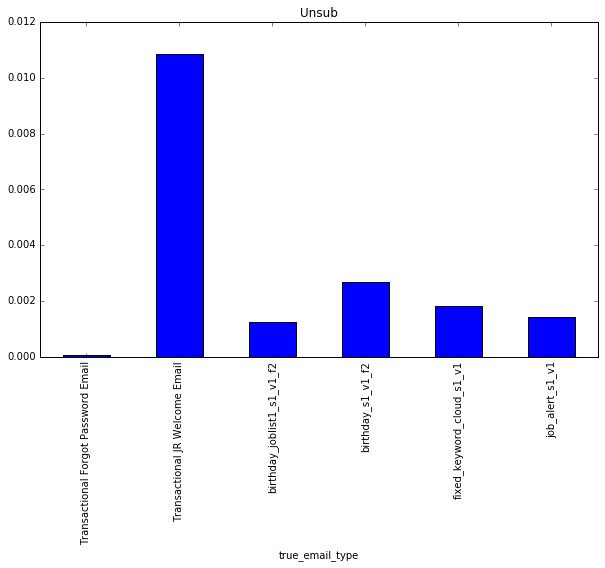

In [89]:
# Analysis
## Email types

email_type = email_member.groupby(['true_email_type']).size() 
by_email_type = email_member.groupby(['action_status','true_email_type']).size() / email_member.groupby(['true_email_type']).size()

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
type_all = email_type.plot.bar()
plt.title("Email types")
plt.show()

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
type_not_opened = by_email_type['Not_Opened'].plot.bar()
plt.title("Not Opened")
plt.show()

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
type_opened = by_email_type['Opened'].plot.bar()
plt.title("Opened")
plt.show()

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
type_clicked = by_email_type['Clicked'].plot.bar()
plt.title("Clicked")
plt.show()

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
type_unsub = by_email_type['Unsub'].plot.bar()
plt.title("Unsub")
plt.show()

# Observation: 
# Welcome emails are 1.5x more likely to lead to unsubscription than other types
# Birthday emails show higher opened but not clicked ratio than other types (i.e., 90% vs. 50% for other types)
# Although ‘forgot password emails’ lead to most clicks, 60% of this email type are not being opened, potentially losing future revenue



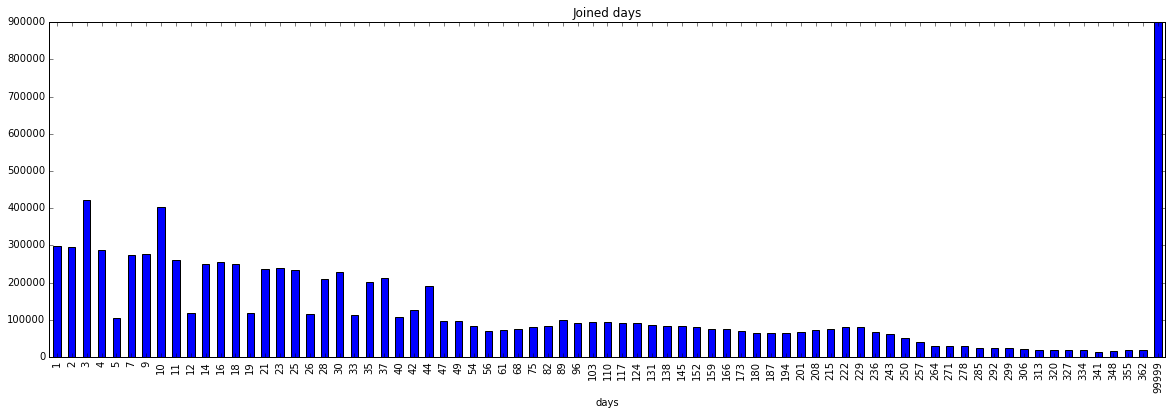

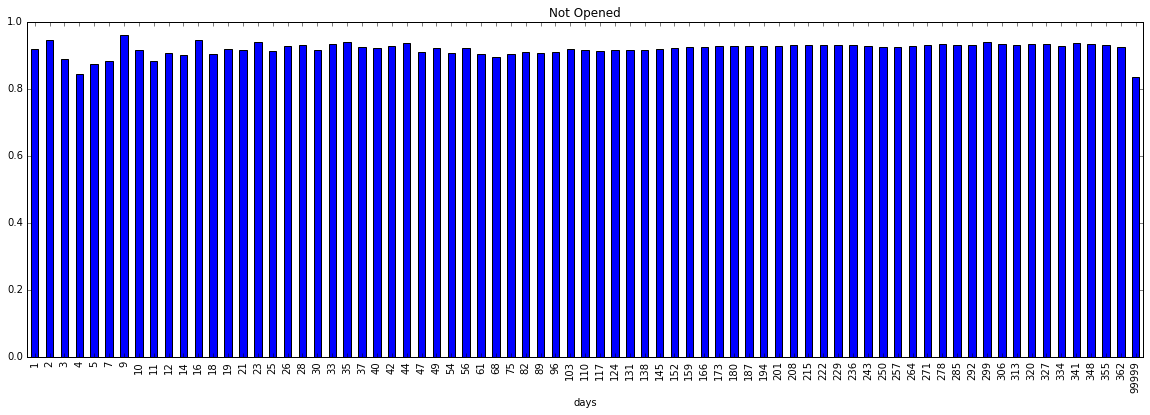

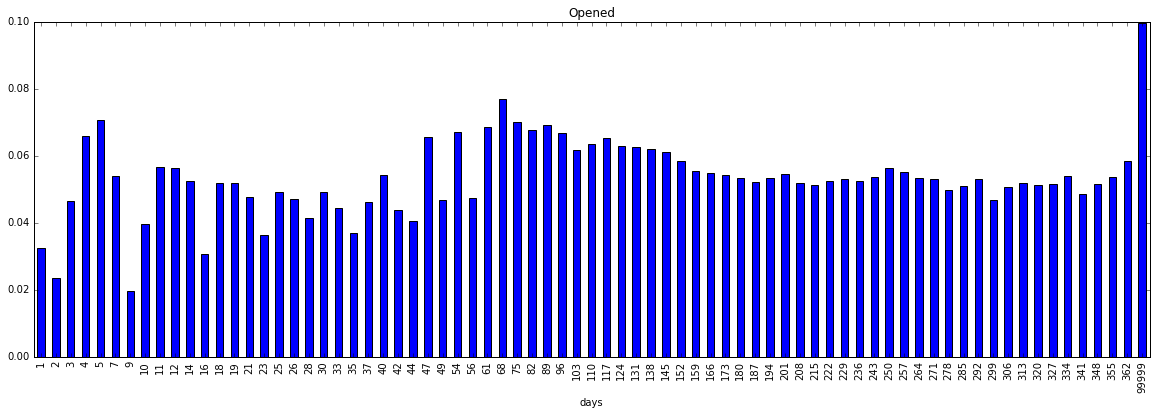

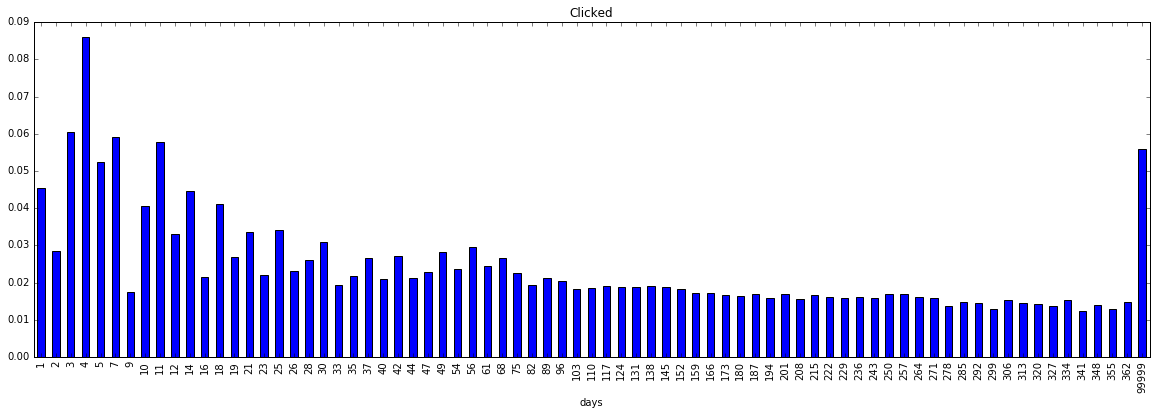

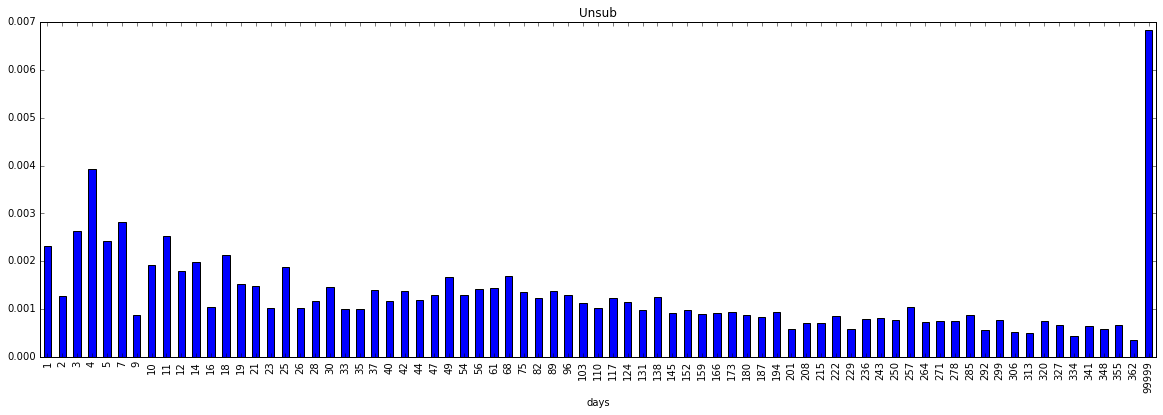

In [90]:
# Analysis
## Days joined - good indicator for the age
joined_days = email_member.groupby(['days']).size() / email_member['days'].sum()
by_joined_days = email_member.groupby(['action_status','days']).size() / email_member.groupby(['days']).size()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
days_all = joined_days.plot.bar()
plt.title("Joined days")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
days_not_opened = by_joined_days['Not_Opened'].plot.bar()
plt.title("Not Opened")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
days_opened = by_joined_days['Opened'].plot.bar()
plt.title("Opened")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
days_clicked = by_joined_days['Clicked'].plot.bar()
plt.title("Clicked")
plt.show()


figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
days_unsub = by_joined_days['Unsub'].plot.bar()
plt.title("Unsub")
plt.show()

# Observation:
# Around 70% of emails were sent to 18% members who have joined for less 16% than 100 days
# Recent joiners are more likely to click on emails
# Clicked emails stabilize after 100 days of joining
# Number of unsubscribed actions tend to decrease as membership age increases (likely sign of natural retention of people 0% benefiting from the Jobcase platform)


//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


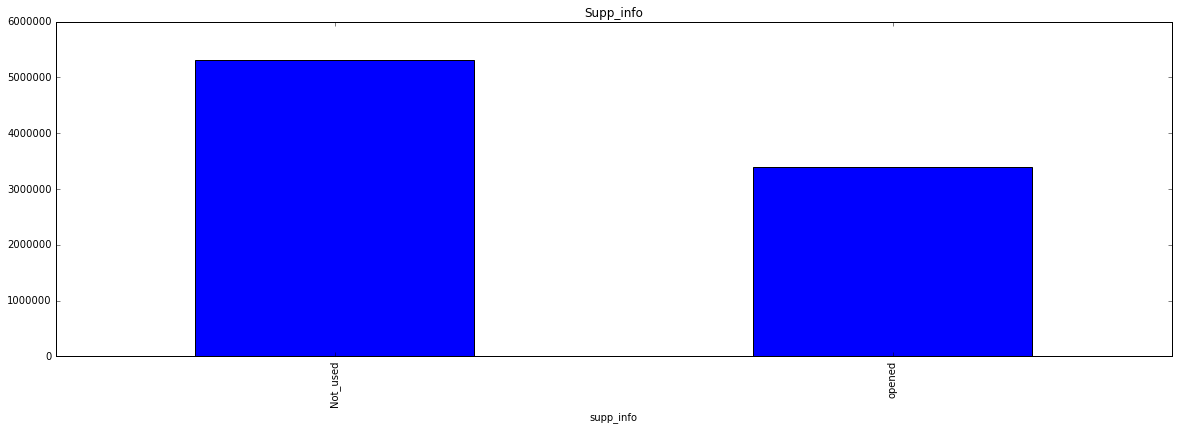

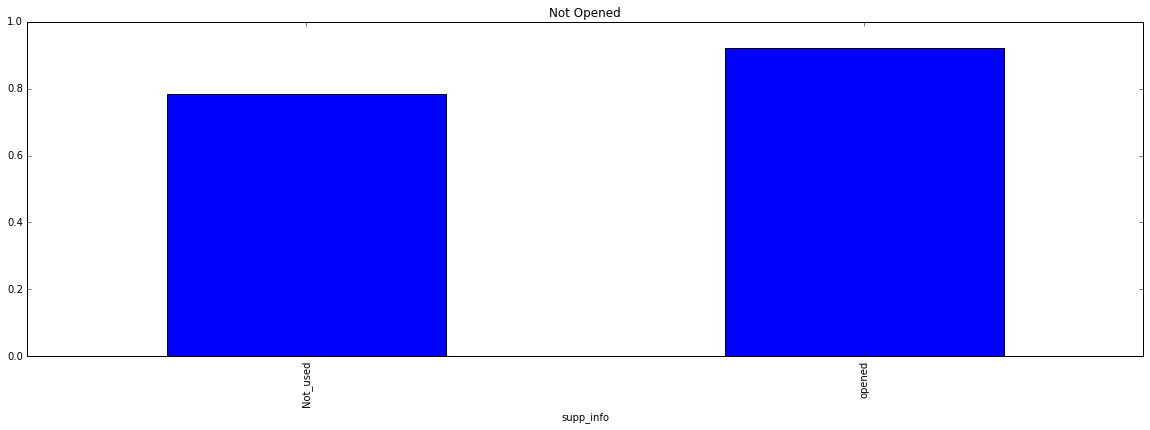

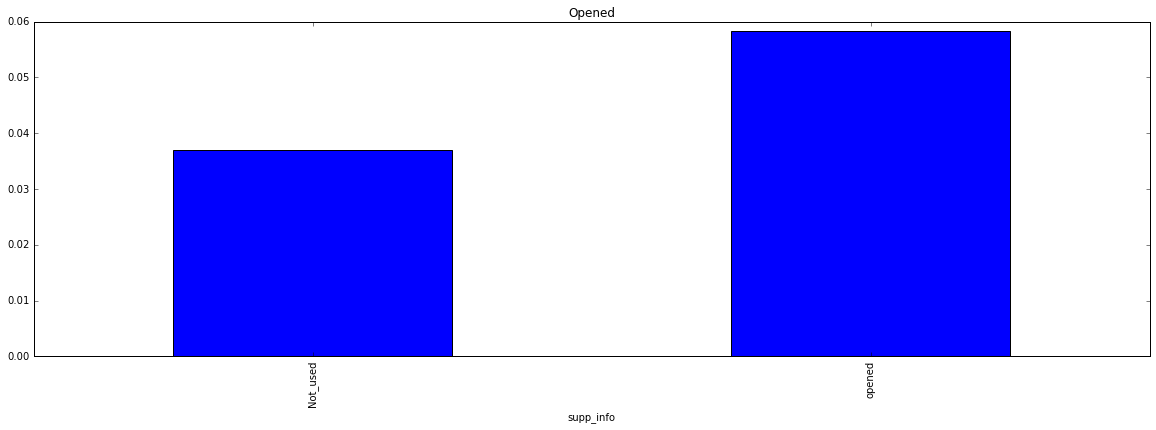

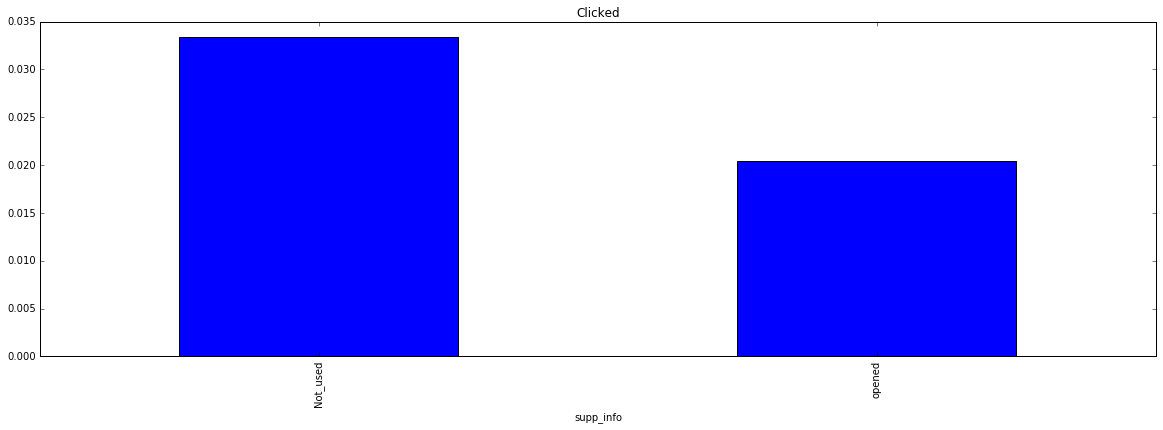

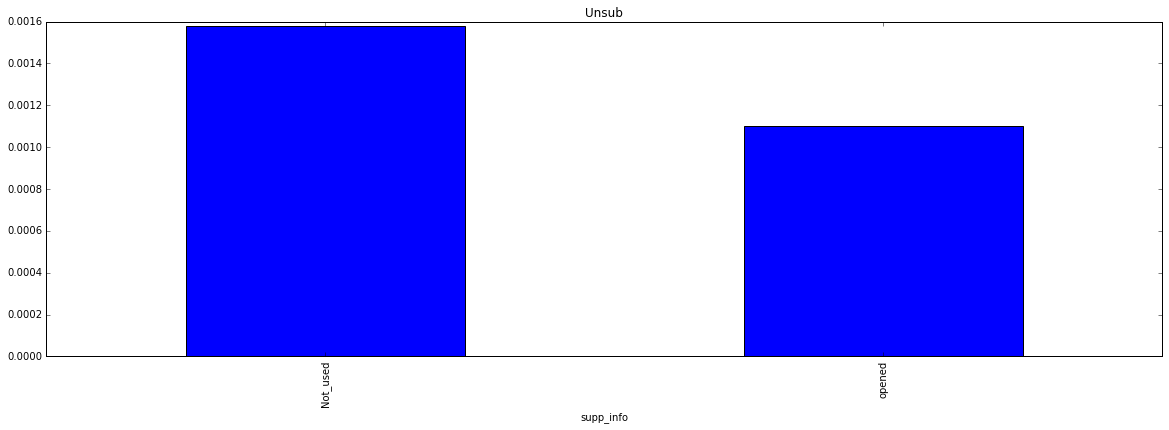

In [149]:
# Analysis
# Supp info
supp_info_data = email_member[(email_member['true_email_type']== 'job_alert_s1_v1')|(email_member['true_email_type']=='fixed_keyword_cloud_s1_v1')]
supp_info_data.loc[supp_info_data['supp_info'] != "opened",'supp_info'] = "Not_used"
supp_info = supp_info_data.groupby(['supp_info']).size()
by_supp_info = supp_info_data.groupby(['action_status','supp_info']).size() / email_member.groupby(['supp_info']).size()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_all = supp_info.plot.bar()
plt.title("Supp_info")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_not_opened = by_supp_info['Not_Opened'].plot.bar()
plt.title("Not Opened")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_opened = by_supp_info['Opened'].plot.bar()
plt.title("Opened")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_clicked = by_supp_info['Clicked'].plot.bar()
plt.title("Clicked")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_unsub = by_supp_info['Unsub'].plot.bar()
plt.title("Unsub")
plt.show()

# Observations:
# Analysis only includes keyword and job alert emails
# Members who opened an email previously share a similar unopened rates to those who have not opened any emails(~90%)
# However, they are 1.8x as likely to not follow through with clicks

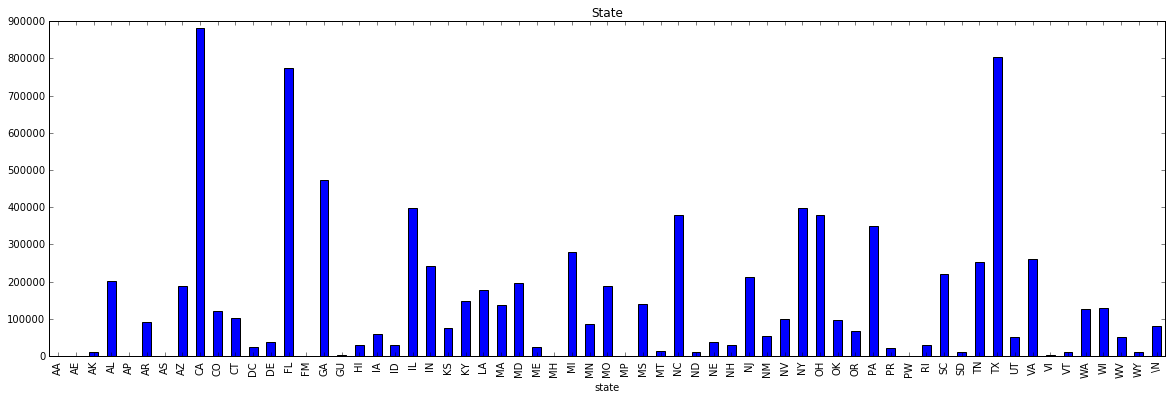

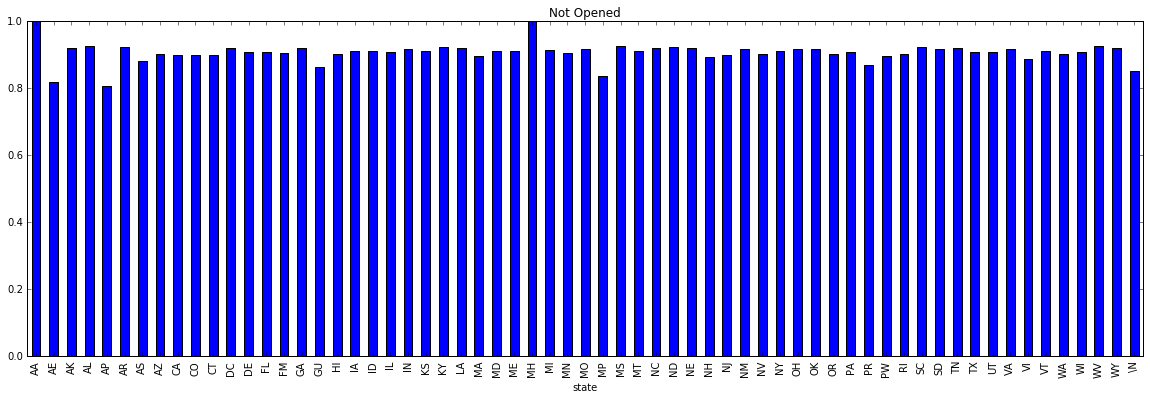

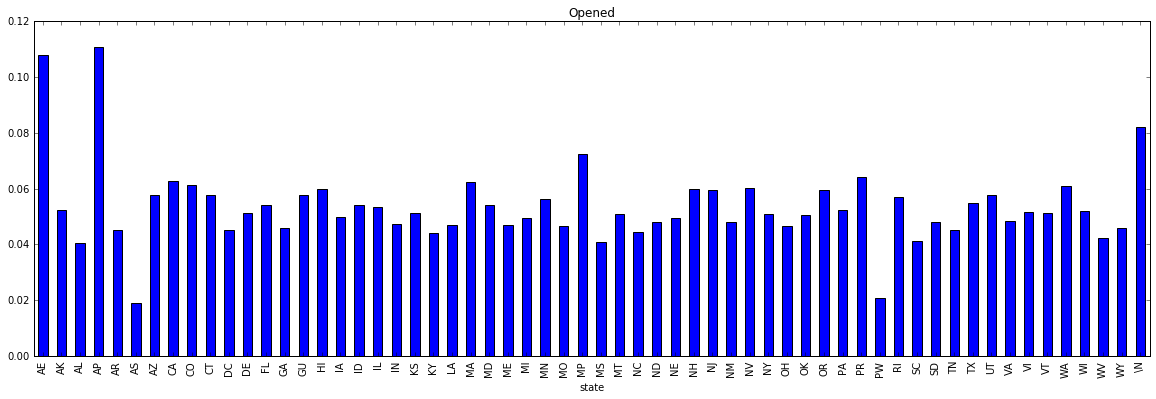

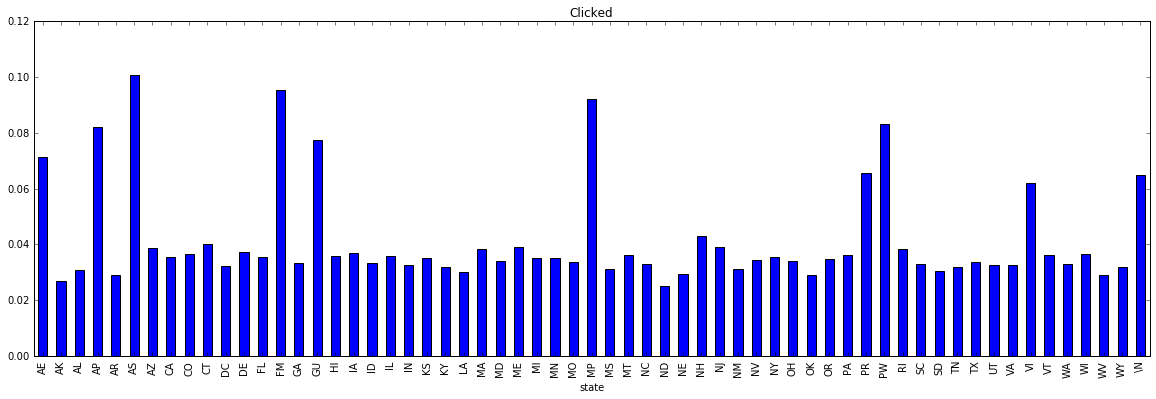

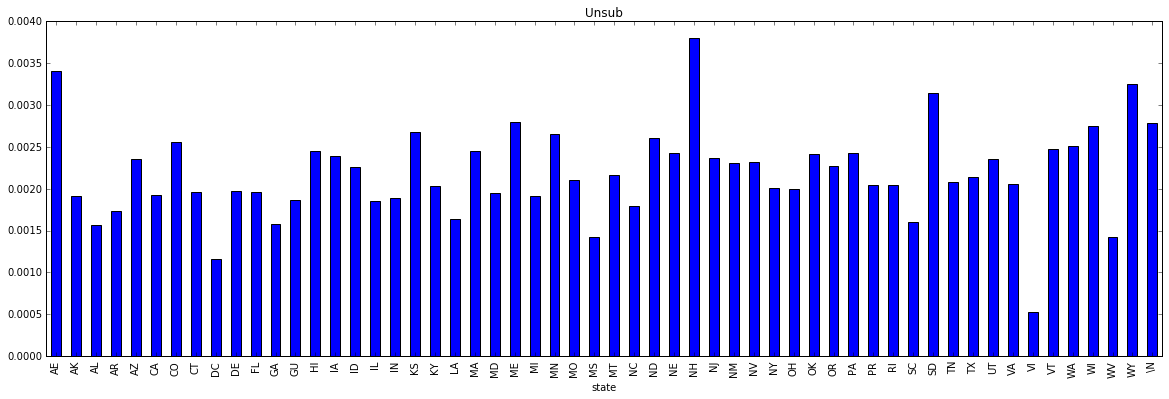

In [92]:
# Analysis
# State info
state_info = email_member.groupby(['state']).size()
by_state_info = email_member.groupby(['action_status','state']).size() / email_member.groupby(['state']).size()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_all = state_info.plot.bar()
plt.title("State")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_not_opened = by_state_info['Not_Opened'].plot.bar()
plt.title("Not Opened")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_opened = by_state_info['Opened'].plot.bar()
plt.title("Opened")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_clicked = by_state_info['Clicked'].plot.bar()
plt.title("Clicked")
plt.show()

figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
supp_unsub = by_state_info['Unsub'].plot.bar()
plt.title("Unsub")
plt.show()


In [327]:
# Number of rows
email_data.shape #9607809
response_data.shape #902915
member_data.shape #1599108
email_member.shape #9607809 - matches number of emails

(9607809, 10)

In [ ]:
# Presentation materials export
joined_days = email_member.groupby(['days']).size() / email_member.groupby(['days']).size().sum()
prinat = email_member.groupby(['hs_or_ged_year']).size()/email_member.groupby(['hs_or_ged_year']).size().sum()

joined_days.to_csv('days.csv')
prinat.to_csv('edyYear.csv')
education.to_csv('education.csv')


In [ ]:
# Can we use supp_info?
email_data.groupby(['member_id']).size().value_counts()
test = email_data[['member_id', 'supp_info']].drop_duplicates()
test2 = (test.groupby(['member_id']).size())
print(test2[test2>3])

In [60]:
# Member_ID referential integrity test
setA = set(email_data['member_id'])
setB = set(member_data.index)

display(len(list(setA-setB)))
display(len(email_data['member_id'].unique()))

# 287671 members from email_data are not included in the memmber_data
#  1886779 all members

287671

1886779

In [ ]:
#################
# Member data
#################

# Check: number of column items in each row
with open(path_member) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        split_line = line.split("\t")
        if len(split_line) != 11:
            print(cnt, split_line)
        line = fp.readline()
        cnt += 1

"""
b'Skipping line 6361: expected 11 fields, saw 12\n'
b'Skipping line 197786: expected 11 fields, saw 12\nSkipping line 220554: expected 11 fields, saw 12\n'
b'Skipping line 398448: expected 11 fields, saw 12\n'
b'Skipping line 965810: expected 11 fields, saw 12\n'
b'Skipping line 1159343: expected 11 fields, saw 12\nSkipping line 1172111: expected 11 fields, saw 13\nSkipping line 1181285: expected 11 fields, saw 12\n'
b'Skipping line 1248580: expected 11 fields, saw 12\nSkipping line 1303875: expected 11 fields, saw 12\n'
b'Skipping line 1398604: expected 11 fields, saw 14\nSkipping line 1419712: expected 11 fields, saw 12\n'
//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
"""